# Safety Recommender GT DS Capstone Project - Judith Thompkins Notes

The primary proposed hypothesis for the Safety Recommender project is as follows:
<p>H1: It is possible to measure crime risk in popular Washington, DC locations by combining information from public databases including Yelp and DC Metro Crime Dataset. We believe we can help stimulate business, increase student safety, and generally reduce crime by providing facts on crime risks for common destinations on the day and time of a planned visit. In addition, by collecting crime-related observations from the public, we could help reduce crime if our information becomes an additional catalyst for business owners and authorities to address the risks. 
Additionally possible hypotheses are as follows:
<p>H2: It is possible to recommend the safest day and time to visit a particular popular Washington, DC by combining public databases including Yelp and DC Metro Crime Dataset. 
<p>H3: It is possible to use measured safety risk to inform target population of safest location on a given day and time for a specific category (such as Mexican Restaurants) as well as to recommend alternate options based on the safety risk. 

# Data

## 1. Crime

A Kaggle dataset provides crime data for Washington, DC. https://www.kaggle.com/vinchinzu/dc-metro-crime-data. The website states that it is: "Dataset of all of the crimes in the DC metro police system ranging from Theft, Arson, Assault, Homicide, Sex Abuse, Robbery, and Burglary. Data can be easily geocoded and mapped, trends can be extracted, and predictions can be made." The dataset includes 347,551 records for crimes committed January 1, 2008 through September 9, 2017.

### Sample Crime Data

In [15]:
import pandas as pd
excel_file = 'safety_recommender_sample.xlsx'
location_sheet1 = pd.read_excel(excel_file, sheet_name=1, index_col=0)
location_sheet1.head(10)

,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,...,year,month,day,hour,minute,second,EW,NS,quad,crimetype
NO1,,,,,,,,,,,,,,,,,,,,,
1,1,2008-08-31 20:47:00,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,...,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
2,2,2008-09-01 00:45:00,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,...,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
3,3,2008-09-01 03:00:00,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,...,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
4,4,2008-09-09 07:46:00,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,...,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
5,5,2008-08-24 20:00:00,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,...,2008,8,24,20,0,0,East,North,Northeast,Non-Violent
6,6,2008-08-24 21:40:00,EVENING,THEFT/OTHER,OTHERS,G STREET NW AND 12TH STREET NW,1.0,105.0,2,2C,...,2008,8,24,21,40,0,East,North,Northeast,Non-Violent
7,7,2008-08-25 06:00:00,MIDNIGHT,THEFT/OTHER,OTHERS,1000 - 1099 BLOCK OF 26TH STREET NW,2.0,207.0,2,2A,...,2008,8,25,6,0,0,West,North,Northwest,Non-Violent
8,8,2008-09-01 13:30:00,DAY,BURGLARY,OTHERS,1707 - 1799 BLOCK OF S STREET NW,3.0,301.0,2,2B,...,2008,9,1,13,30,0,West,North,Northwest,Non-Violent
9,9,2008-09-01 14:00:00,DAY,THEFT/OTHER,OTHERS,1300 - 1699 BLOCK OF CONNECTICUT AVENUE NW,3.0,308.0,2,2B,...,2008,9,1,14,0,0,West,North,Northwest,Non-Violent


Also see:  http://crimemap.dc.gov/CrimeDefinitions.aspx and https://github.com/eshilts/dc_crime_data



## 2. Location

### Sample Location Data

The sample dataset for DC locations to be reviewed against DC crime data starts comes from data scraped from the Yelp website for Restaurants in zip codes 20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20009, and 200010.

In [12]:
import pandas as pd
excel_file = 'safety_recommender_sample.xlsx'
crime_sheet2 = pd.read_excel(excel_file, sheet_name=0, index_col=0)
crime_sheet2.head(10)

,business_name,rank,review_count,categories,rating,address,reservation_available,accept_pickup,price_range,url
yelp_busines_id,,,,,,,,,,
1,Unconventional Diner,1,70,"Diners,Comfort Food",4.5,"1207 9th St NW Washington, DC 20001",False,False,2,https://www.yelp.com/biz/unconventional-diner-...
2,The Pig,2,1340,"American (Traditional),Cocktail Bars",4.0,"1320 14th St NW Washington, DC 20005",False,False,2,https://www.yelp.com/biz/the-pig-washington-2?...
3,Spark,3,28,"Barbeque,Caribbean",5.0,"1626 N Capitol St NW Washington, DC 20002",False,False,2,https://www.yelp.com/biz/spark-washington?frvs...
4,Cherry Blossom Pub,4,56,"Pubs,Pop-Up Restaurants",4.5,"1843 7th St NW Washington, DC 20001",False,False,2,https://www.yelp.com/biz/cherry-blossom-pub-wa...
5,Tiger Fork,5,231,"Chinese,Hong Kong Style Cafe,Cocktail Bars",4.0,"922 N St NW Washington, DC 20001",False,False,2,https://www.yelp.com/biz/tiger-fork-washington...
6,Busboys and Poets - 5th and K,6,1477,"American (Traditional),Breakfast & Brunch,Medi...",4.0,"1025 5th St NW Washington, DC 20001",False,False,2,https://www.yelp.com/biz/busboys-and-poets-5th...
7,The Dabney Cellar,7,12,"Bars,American (New)",4.5,"1222 9th St NW Washington, DC 20001",False,False,0,https://www.yelp.com/biz/the-dabney-cellar-was...
8,The Alibi,8,213,"British,Pubs,Seafood",4.5,"237 2nd St NW Washington, DC 20001",False,False,2,https://www.yelp.com/biz/the-alibi-washington?...
9,Reren,9,888,"Ramen,Asian Fusion,Chinese",4.0,"817 7th St NW Washington, DC 20001",False,True,2,https://www.yelp.com/biz/reren-washington?frvs...


### Yelp Scraper

The first "full" dataset (for DC Restaurants in Yelp) comes from a Yelp scraper available at:  https://gist.github.com/scrapehero/8c61789f3f0c9d1dbc6859b635de2e4f 

This dataset, along with Franco's dataset, could be used for initial analysis and model training. However, it might be better for a final product might use the Yelp API to retrieve current Restaurants and/or other destination types (e.g., hotels, bars, nightclubs, gyms) and select an address for the crime analysis. 

This will become clearer as we learn about past Yelp data sources for projects. We will learn more about which datasets will work best for us and how to work with data sources in class. Initially, we are just exploring at options to consider.

The scraper takes 2 arguments:  zip code and "business catetory". The scraper was run initially on DC zip codes for the Restaurant category to get a dataset of approximately 500 records. It might also be run for other common Yelp business categories that reflect common business or tourist destinations that used as Yelp categories like: hotel, gym, nightclub, bar, diner.

#### DC Zip Codes for Yelp Scraper

This is a good reference for DC zip codes: http://www.city-data.com/zipmaps/Washington-District-of-Columbia.html The site includes some interesting statistics by zip code as well.  

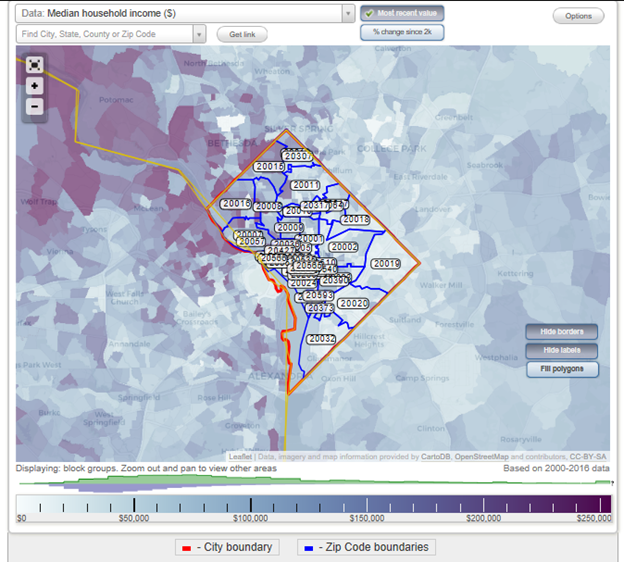

The zip codes are:  20001, 20002, 20003, 20004, 20005, 20006, 20007, 20008, 20009, 20010, 20011, 20012, 20015, 20016, 20017, 20018, 20019, 20020, 20024, 20032, 20036, 20037, 20045, 20052, 20053, 20057, 20064, 20202, 20204, 20228, 20230, 20240, 20245, 20260, 20307, 20317, 20319, 20373, 20390, 20405, 20418, 20427, 20506, 20510, 20520, 20535, 20540, 20551, 20553, 20560, 20565, 20566, 20593. 

### Yelp APIs

There are also Yelp APIs to explore and consider. For example:  

1. https://github.com/Yelp/yelp-python.  A Python library for the Yelp API. It simplifies the process of authentication, request construction, and response parsing for Python developers using the Yelp API. This clientlib is built and tested on Python 2.7 and 3.4.

Deprecated
This library works only with the older Yelp API V2.

Starting on April 1st, 2017, you will no longer be able to sign up for API v2.

Please use the newer Yelp Fusion API instead:

https://www.yelp.com/developers/documentation/v3/get_started
https://github.com/Yelp/yelp-fusion


### Parsing Addresses

In order to match a street address to a DC crime location block it is necessary to parse addresses into a street name and street number. This blog entry discusses options: https://stackoverflow.com/questions/9463471/is-there-a-library-for-parsing-us-addresses. Here is Python code used to achieve that purpose: http://pyparsing.wikispaces.com/file/view/streetAddressParser.py

In [8]:
from pyparsing import *

# define number as a set of words
units = oneOf("Zero One Two Three Four Five Six Seven Eight Nine Ten"
          "Eleven Twelve Thirteen Fourteen Fifteen Sixteen Seventeen Eighteen Nineteen",
          caseless=True)
tens = oneOf("Ten Twenty Thirty Forty Fourty Fifty Sixty Seventy Eighty Ninety",caseless=True)
hundred = CaselessLiteral("Hundred")
thousand = CaselessLiteral("Thousand")
OPT_DASH = Optional("-")
numberword = ((( units + OPT_DASH + Optional(thousand) + OPT_DASH + 
                  Optional(units + OPT_DASH + hundred) + OPT_DASH + 
                  Optional(tens)) ^ tens ) 
               + OPT_DASH + Optional(units) )

# number can be any of the forms 123, 21B, 222-A or 23 1/2
housenumber = originalTextFor( numberword | Combine(Word(nums) + 
                    Optional(OPT_DASH + oneOf(list(alphas))+FollowedBy(White()))) + 
                    Optional(OPT_DASH + "1/2")
                    )
numberSuffix = oneOf("st th nd rd").setName("numberSuffix")
streetnumber = originalTextFor( Word(nums) + 
                 Optional(OPT_DASH + "1/2") +
                 Optional(numberSuffix) )

# just a basic word of alpha characters, Maple, Main, etc.
name = ~numberSuffix + Word(alphas)

# types of streets - extend as desired
type_ = Combine( MatchFirst(map(Keyword,"Street St Boulevard Blvd Lane Ln Road Rd Avenue Ave "
                        "Circle Cir Cove Cv Drive Dr Parkway Pkwy Court Ct Square Sq"
                        "Loop Lp".split())) + Optional(".").suppress())

# street name 
nsew = Combine(oneOf("N S E W North South East West NW NE SW SE") + Optional("."))
streetName = (Combine( Optional(nsew) + streetnumber + 
                        Optional("1/2") + 
                        Optional(numberSuffix), joinString=" ", adjacent=False )
                ^ Combine(~numberSuffix + OneOrMore(~type_ + Combine(Word(alphas) + Optional("."))), joinString=" ", adjacent=False) 
                ^ Combine("Avenue" + Word(alphas), joinString=" ", adjacent=False)).setName("streetName")

# PO Box handling
acronym = lambda s : Regex(r"\.?\s*".join(s)+r"\.?")
poBoxRef = ((acronym("PO") | acronym("APO") | acronym("AFP")) + 
             Optional(CaselessLiteral("BOX"))) + Word(alphanums)("boxnumber")

# basic street address
streetReference = streetName.setResultsName("name") + Optional(type_).setResultsName("type")
direct = housenumber.setResultsName("number") + streetReference
intersection = ( streetReference.setResultsName("crossStreet") + 
                 ( '@' | Keyword("and",caseless=True)) +
                 streetReference.setResultsName("street") )
streetAddress = ( poBoxRef("street")
                  ^ direct.setResultsName("street")
                  ^ streetReference.setResultsName("street")
                  ^ intersection )

tests = """\
    3120 De la Cruz Boulevard
    100 South Street
    123 Main
    221B Baker Street
    10 Downing St
    1600 Pennsylvania Ave
    33 1/2 W 42nd St.
    454 N 38 1/2
    21A Deer Run Drive
    256K Memory Lane
    12-1/2 Lincoln
    23N W Loop South
    23 N W Loop South
    25 Main St
    2500 14th St
    12 Bennet Pkwy
    Pearl St
    Bennet Rd and Main St
    19th St
    1500 Deer Creek Lane
    186 Avenue A
    2081 N Webb Rd
    2081 N. Webb Rd
    1515 West 22nd Street
    2029 Stierlin Court
    P.O. Box 33170
    The Landmark @ One Market, Suite 200
    One Market, Suite 200
    One Market
    One Union Square
    One Union Square, Apt 22-C
    """.split("\n")

# how to add Apt, Suite, etc.
suiteRef = (
            oneOf("Suite Ste Apt Apartment Room Rm #", caseless=True) + 
            Optional(".") + 
            Word(alphanums+'-')("suitenumber"))
streetAddress = streetAddress + Optional(Suppress(',') + suiteRef("suite"))

for t in map(str.strip,tests):
    if t:
        #~ print "1234567890"*3
        print(t)
        addr = streetAddress.parseString(t, parseAll=True)
        #( # use this version for testing
        #~ addr = streetAddress.parseString(t)
        print("Number:", addr.street.number)
        print("Street:", addr.street.name)
        print("Type:", addr.street.type)
        if addr.street.boxnumber:
            print ("Box:", addr.street.boxnumber)
        print (addr.dump())
        print

3120 De la Cruz Boulevard
Number: 3120 
Street: De la Cruz
Type: Boulevard
['3120 ', 'De la Cruz', 'Boulevard']
- name: 'De la Cruz'
- number: '3120 '
- street: ['3120 ', 'De la Cruz', 'Boulevard']
  - name: 'De la Cruz'
  - number: '3120 '
  - type: 'Boulevard'
- type: 'Boulevard'
100 South Street
Number: 100 
Street: South
Type: Street
['100 ', 'South', 'Street']
- name: 'South'
- number: '100 '
- street: ['100 ', 'South', 'Street']
  - name: 'South'
  - number: '100 '
  - type: 'Street'
- type: 'Street'
123 Main
Number: 123 
Street: Main
Type: 
['123 ', 'Main']
- name: 'Main'
- number: '123 '
- street: ['123 ', 'Main']
  - name: 'Main'
  - number: '123 '
221B Baker Street
Number: 221B 
Street: Baker
Type: Street
['221B ', 'Baker', 'Street']
- name: 'Baker'
- number: '221B '
- street: ['221B ', 'Baker', 'Street']
  - name: 'Baker'
  - number: '221B '
  - type: 'Street'
- type: 'Street'
10 Downing St
Number: 10 
Street: Downing
Type: St
['10 ', 'Downing', 'St']
- name: 'Downing'
- num

# Domain Model

This is a rough draft of a domain model that can aid our discussion of the attributes/properties of the major classes/objects that will be manipulated by our data product. It also includes some possible methods/operations/functions that we might have to perform on those objects. 

The class models are related to our requirement to use object-oriented programming methods. They are craft class blueprints for what might be the main objects.

<img src="safety_recommender_domain_model2.png">

## Crime Class

### Attributes

### Methods

## Location Class

### Attributes

### Methods

# Possible Statistics & Recommendations

1. Numbers and types of crimes at the same location at the same day of year and time over 5 years.
2. The number of crimes of all types committed within the destination block during the previous 90 days.  
3. A bar chart with the number of the following crimes committed within the destination block during the previous 90 days:  
o	Robberies
o	Sexual assaults
o	Assaults with deadly weapons
o	Auto thefts
4. A five-star safety recommendation for that location at that specific day of the week and time of day.  
5. Recommendations on the safest days and times to visit the restaurant.  
6. Recommendations on safer restaurants nearby, with the same cuisine, to visit at that time and day of the week.  


# Possible User Feedback

In [ ]:
The user will be able to add Waze-style feedback using a set of pre-defined alerts.  We would not allow free form comments in to avoid the collection of data that reflects racial profiling and other trends that might not be useful for our purposes.  We could use icons in the style like the following used by Waze (show below) with feedback options for the selected destination that might include some things like:  
1. Followed by stranger
2. Offered drugs
3. Saw drug user
4. Needle on street
5. Stranger cursed/threatened
6. Crime victim
7. Saw crime committed
8. Threatened
9. Gun shot


The feedback might be captured by simple icons like the following used in Waze.

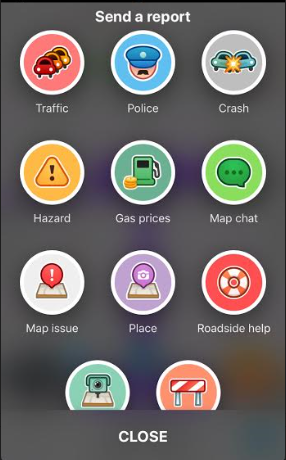

# TASKS & QUESTIONS

1. Questions for Nicole about DC data. She may know the answers to some since she works with DC emergency call data:  
   a. Is there any data available describing victims and their physical descriptions and relationship to the perpetrator?
   b. Is there any programming available that converts addresses to the "hundred blocks" included in the crime data?
2. Need to be sure the DC Crime dataset is the set that includes geocoding.
3. Which columns are used for geocoding?
4. For Location data should we combine the Yelp data with Lee's restaurant data?
5. For Location data should we also scrape Yelp for hotels, gyms, bars, diners, nightclubs?
6. For Location data should we also enter adddata for DC university dorms, libraries, student centers for: Georgetown, Howard, GW.  
7. Need to develop crime statistics analysis routine to represent safety ratings, information and recommendations.

